# Questions

-Evaluate the performance of your model with the metrics you have learned in this course.

-Plot the ROC and the precision / recall curves for different "c" values.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None


In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic["Sex_"]=pd.get_dummies(titanic["Sex"], drop_first=True)
titanic.groupby(["Embarked"])["PassengerId"].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [4]:
titanic.dropna(subset=['Age', 'Embarked'],inplace=True)

In [5]:
titanic["Sib/age"] = titanic["SibSp"]*titanic["Age"]

In [6]:
X_ = titanic[["Pclass","Sex_","Age","Parch","Sib/age"]]
Y_ = titanic["Survived"]

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, Y_, test_size = 0.2, random_state = 465)

In [7]:
titanic_prediction_model = LogisticRegression()
titanic_prediction_model.fit(X_train_, y_train_)

LogisticRegression()

In [8]:
titanic_prediction_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
train_prediction = titanic_prediction_model.predict(X_train_)
test_prediction = titanic_prediction_model.predict(X_test_)

print(train_prediction,"\n")
print(test_prediction)

[1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 0 

In [10]:
test_predict_prob = titanic_prediction_model.predict_proba(X_test_)
print(test_predict_prob)

[[0.88867782 0.11132218]
 [0.77367297 0.22632703]
 [0.90503565 0.09496435]
 [0.9493487  0.0506513 ]
 [0.36674792 0.63325208]
 [0.90333024 0.09666976]
 [0.37680634 0.62319366]
 [0.44942148 0.55057852]
 [0.68446934 0.31553066]
 [0.86766334 0.13233666]
 [0.89623249 0.10376751]
 [0.74825942 0.25174058]
 [0.54427205 0.45572795]
 [0.87211891 0.12788109]
 [0.26611813 0.73388187]
 [0.81362366 0.18637634]
 [0.7877941  0.2122059 ]
 [0.81621946 0.18378054]
 [0.88867782 0.11132218]
 [0.92486629 0.07513371]
 [0.22527705 0.77472295]
 [0.86766334 0.13233666]
 [0.87644584 0.12355416]
 [0.55120483 0.44879517]
 [0.45659028 0.54340972]
 [0.83083754 0.16916246]
 [0.25288351 0.74711649]
 [0.04966655 0.95033345]
 [0.87211891 0.12788109]
 [0.34950018 0.65049982]
 [0.87211891 0.12788109]
 [0.87644584 0.12355416]
 [0.28063752 0.71936248]
 [0.61200022 0.38799978]
 [0.34060321 0.65939679]
 [0.15604783 0.84395217]
 [0.40491791 0.59508209]
 [0.87644584 0.12355416]
 [0.74006044 0.25993956]
 [0.89251352 0.10748648]


# -----------Performance of Metrics-------------

In [11]:
confusion_matrix_train = confusion_matrix(y_train_, train_prediction)
confusion_matrix_test = confusion_matrix(y_test_, test_prediction)

In [12]:
print("Confusion Matrix Train Data\n",confusion_matrix_train,"\n","**************************")
print("Confusion Matrix Test Data \n",confusion_matrix_test)

Confusion Matrix Train Data
 [[282  54]
 [ 61 172]] 
 **************************
Confusion Matrix Test Data 
 [[80  8]
 [18 37]]


First cell in data: Which is actually not survived and predicted to be not survived. 0-0

Second cell in data: Which is actually not survived but predicted to be survived.0-1

Third cell in data: Which is actually survived but predicted to be not survived.1-0

Forth cell in data: Which is actually suvived and predicted to be survived. 1-1

In [13]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 80
True positive amount  : 37
False positive amount : 8
False negative amount : 18


In [14]:
print("Accuracy value by the train data: :", titanic_prediction_model.score(X_train_,y_train_))
print("Accuracy value by the test data: ",titanic_prediction_model.score(X_test_,y_test_)) #True/Total
errorRate = 1-titanic_prediction_model.score(X_test_,y_test_)
print("Error Rate: ",errorRate)

Accuracy value by the train data: : 0.7978910369068541
Accuracy value by the test data:  0.8181818181818182
Error Rate:  0.18181818181818177


Accuracy values are close to each other in  in test and training data. So it can be said that there is no overfitting.

In [15]:
print("precision_score() value      : ",  precision_score(y_test_, test_prediction))
#It is a measure of how much is correctly predicted from all classes.

precision_score() value      :  0.8222222222222222


In [16]:
print("recall_score() value      : ",  recall_score(y_test_, test_prediction))
#Of all the positive classes, how accurately you guessed

recall_score() value      :  0.6727272727272727


In [17]:
precision = precision_score(y_test_, test_prediction)
recall = recall_score(y_test_, test_prediction)


In [18]:
print("f1_score() value     : ",  f1_score(y_test_, test_prediction))

f1_score() value     :  0.7400000000000001


In [19]:
print(classification_report(y_test_, test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.82      0.67      0.74        55

    accuracy                           0.82       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.82      0.82      0.81       143



# -------ROC Curve(ROC/AUC)-------

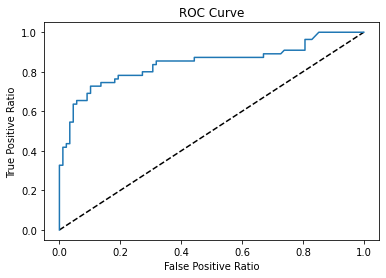

In [20]:
test_prediction_proba = test_predict_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test_,test_prediction_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [21]:
print('AUC value : ', roc_auc_score(y_test_, test_prediction_proba))

AUC value :  0.8432851239669421


In [22]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train_, y_train_)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train_, y_train_),
                                              'Test Accuracy': lr.score(X_test_, y_test_)
                                             }, ignore_index=True)
display(accuracy_values)  

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.594025,0.629371
1,0.010,0.766257,0.748252
2,0.100,0.801406,0.825175
3,1.000,0.797891,0.818182
4,10.000,0.796134,0.825175
5,100.000,0.796134,0.825175
6,1000.000,0.796134,0.825175


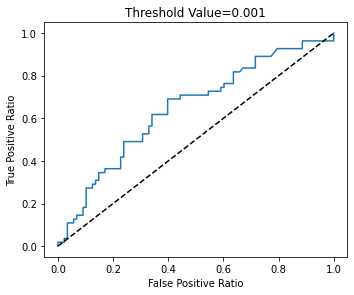

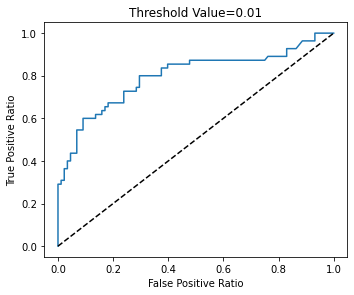

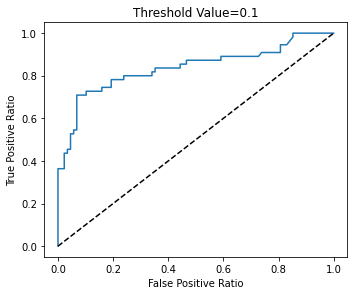

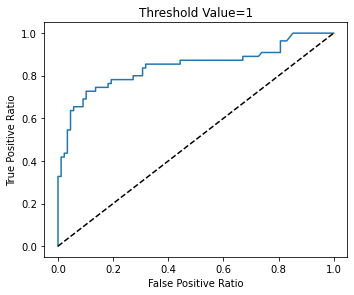

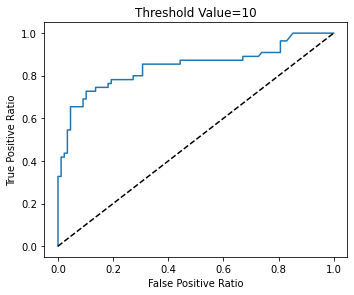

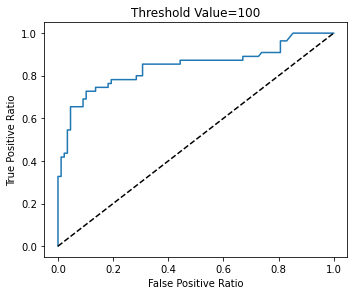

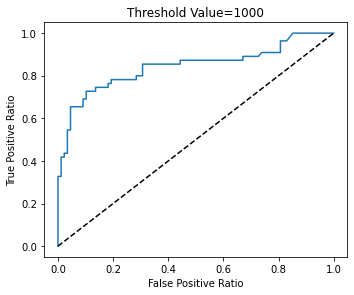

In [23]:
for c in C_values:
   
   
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train_, y_train_)
    test_pred_proba_=lr.predict_proba(X_test_)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test_,test_pred_proba_)
    
    
    plt.figure(figsize=(25,25))
    i=1
    plt.subplot(5,4,i)
    plt.title("Threshold Value={}".format(c))
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    i +=1
    plt.plot()
    

As seen best result of c is 1

# ------Precision/Recall Curve-------

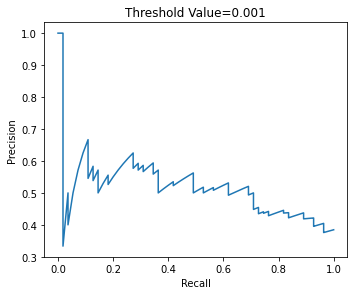

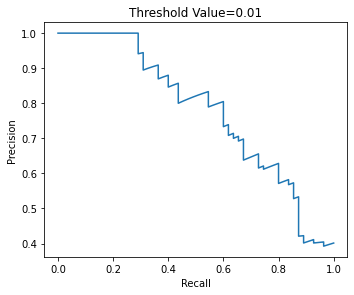

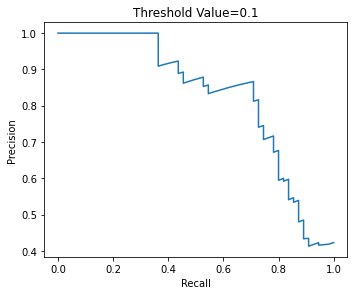

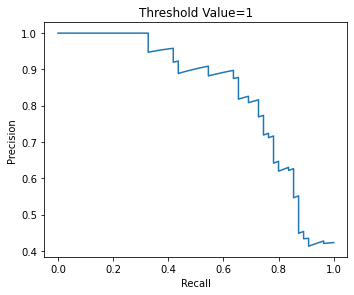

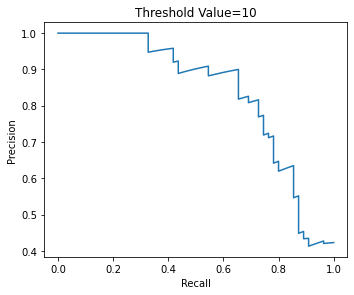

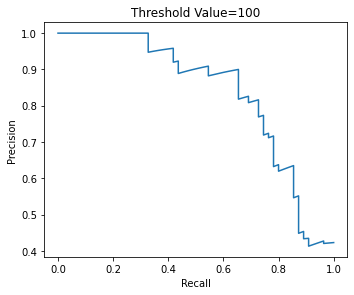

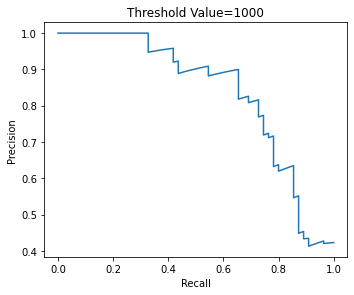

In [24]:
for c in C_values:
   
   
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train_, y_train_)
    test_pred_proba_=lr.predict_proba(X_test_)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test_, test_pred_proba_)
    
    
    plt.figure(figsize=(25,25))
    i=1
    plt.subplot(5,4,i)
    plt.title("Threshold Value={}".format(c))
    plt.plot(recall,precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    i +=1
    plt.plot()
